### SARIMA

1.  SARIMA stands for Seasonal AutoRegressive Integrated Moving Average. 

2.  It is used when the data has trend and seasonality.

3.  It is used when ARIMA fails to capture the seasonal patterns.

### Goal:

Forecast the monthly sales data using SARIMA(Seasonal AutoRegressive Integrated Moving Average) Model.

### Importances of SARIMA

1. It is used when the data has trand and seasonality.

2. It is used when the data is facing with repeating syscles.

3. It is used for forecasting the time series data.

4. It produces more accurate forecasts than the ARIMA Model.

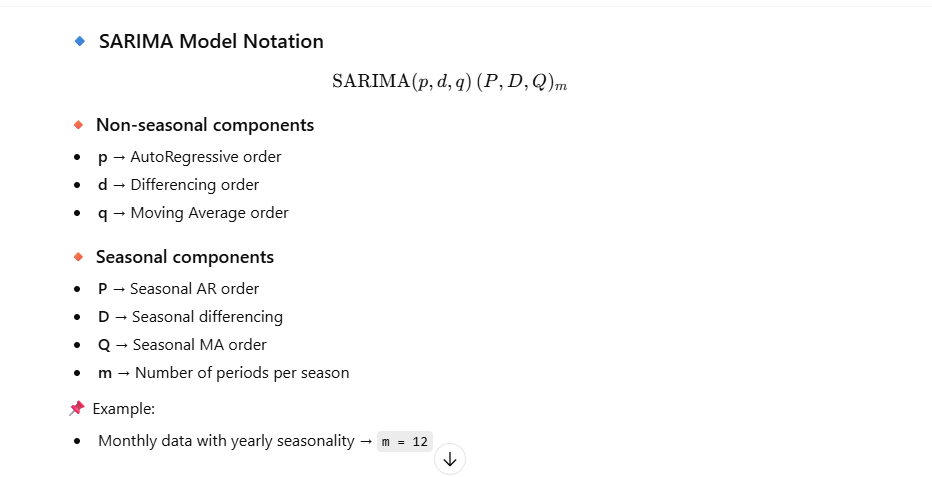


### Steps used in this Algorithm:-

1. Import Required Libraries

2. Create Sample Time Series Data

3. Visualize Time Series

4. Check the Stationarity of the Time Series using ADF Test

5. Train–Test Split 

6. Build SARIMA Model

7. Forecast Next 12 Months

8. Evaluate Model Performance

9. Plot Actual vs Forecast

### Step 1: Import Required Libraries

In [263]:
import numpy  as  np
import pandas as  pd
import matplotlib.pyplot  as  plt
import seaborn            as  sns
import warnings

from statsmodels.tsa.statespace.sarimax  import SARIMAX
from statsmodels.tsa.stattools           import adfuller
from sklearn.metrics                     import  mean_absolute_error, mean_squared_error

warnings.filterwarnings("ignore")

### Step 2:  Create Sample Time Series Data

In [264]:
# Create sample monthly data (replace with your own dataset)
date_range = pd.date_range(start="2018-01-01", periods=72, freq="M")

np.random.seed(42)
data = np.random.randint(100, 200, size=len(date_range))

df = pd.DataFrame({
    "Date": date_range,
    "Sales": data
})


In [265]:
df

,Date,Sales
0,2018-01-31,151
1,2018-02-28,192
2,2018-03-31,114
3,2018-04-30,171
4,2018-05-31,160
...,...,...
67,2023-08-31,177
68,2023-09-30,180
69,2023-10-31,135
70,2023-11-30,149


In [266]:
### Set the "Date" column as index

df.set_index("Date", inplace = True)

In [267]:
### arrange all the values in the increasing order of Date

df.sort_values(by="Date")

,Sales
Date,
2018-01-31,151
2018-02-28,192
2018-03-31,114
2018-04-30,171
2018-05-31,160
...,...
2023-08-31,177
2023-09-30,180
2023-10-31,135


### OBSERVATIONS:

1.  The dataset contains the total sales value obtained at the end of every month.

### Step 3: Visualize Time Series

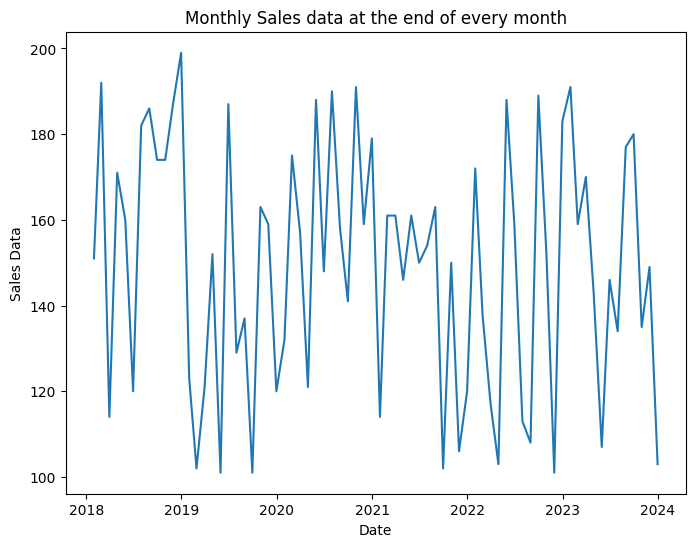

In [268]:
plt.figure(figsize=(8,6))

### plot the actual sales data
plt.plot(df['Sales'])

### get the title of the graph
plt.title("Monthly Sales data at the end of every month")

plt.xlabel("Date")

plt.ylabel("Sales Data")

plt.show()

### OBSERVATIONS:

1. The above dataset shows the monthly distribution of the sales data collected from 2018 till 2024.

2.  This distribution of data has trends and seasonal patterns in it.

### Step 4: Check the Stationarity of the Time Series using ADF Test

In [269]:
### define the function
def adffullertest(Series):
    ### check the stationarity of the time series data
    res = adfuller(Series)
    print("ADF Statistics is:", res[0])
    print("P Value is:", res[1])


adffullertest(df['Sales'])

ADF Statistics is: -8.265679413528796
P Value is: 4.945922795756535e-13


### OBSERVATIONS:

1. Here p value is 0.000494 <= 0.05, So the time series is stationary in nature.

### Step 5: Train–Test Split 

In [270]:
train = df.iloc[:-12]

test  = df.iloc[-12:]

In [271]:
train

,Sales
Date,
2018-01-31,151
2018-02-28,192
2018-03-31,114
2018-04-30,171
2018-05-31,160
2018-06-30,120
2018-07-31,182
2018-08-31,186
2018-09-30,174


In [272]:
test

,Sales
Date,
2023-01-31,191
2023-02-28,159
2023-03-31,170
2023-04-30,143
2023-05-31,107
2023-06-30,146
2023-07-31,134
2023-08-31,177
2023-09-30,180


### OBSERVATIONS:

1. The entire sales data is divided into the training and testing data.

### Step 6: Build SARIMA Model

In [273]:
### Create an object for SARIMAX

model = SARIMAX(
    train["Sales"]                 ,
    order = (1,1,1)                ,
    seasonal_order = (1,1,1,12)    ,
    enforce_stationarity = False   ,
    enforce_invertibility = False 
)


### Train the SARIMAX model

model_fit = model.fit()


### Get the summary of the model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -724.339
Date:                            Sat, 07 Feb 2026   AIC                           1458.679
Time:                                    10:50:54   BIC                           1466.161
Sample:                                01-31-2018   HQIC                          1461.197
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0083         -0        inf      0.000      -0.008      -0.008
ma.L1         -0.9394         -0        inf      0.000      -0.939      -0.939
ar.S.L12      -0.0039   3.17e-34  -1.23e+31      0.000      -0.004      -0.004
ma.S.L12     2.72e+14   2.35e-33   1.16e+47      0.000    2.72e+14    2.72e+14
sigma2        2.5e-11   3.34e-10      0.075      0.940   -6.29e-10    6.79e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.69   Prob(JB):                         0.24
Heteroskedasticity (H):               0.84   Skew:                             0.66
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

### Step 7: Forecast Next 12 Months

In [274]:
### perform the forecasting of the sales for next 12 months

steps = 12

forecast = model_fit.forecast(steps)

print(forecast)

forecast_index = pd.date_range(
    start=train.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq="M"
)

forecast_df = pd.DataFrame({
    "Forecast": forecast
}, index=forecast_index)


2023-01-31    168.032911
2023-02-28    134.902197
2023-03-31    113.979439
2023-04-30     99.975579
2023-05-31    184.702747
2023-06-30    155.772904
2023-07-31    109.967784
2023-08-31    105.022350
2023-09-30    185.468891
2023-10-31    148.800187
2023-11-30     97.827470
2023-12-31    179.562434
Freq: ME, Name: predicted_mean, dtype: float64


In [275]:
forecast_df

,Forecast
2023-01-31,168.032911
2023-02-28,134.902197
2023-03-31,113.979439
2023-04-30,99.975579
2023-05-31,184.702747
2023-06-30,155.772904
2023-07-31,109.967784
2023-08-31,105.022350
2023-09-30,185.468891
2023-10-31,148.800187


### OBSERVATIONS:

1.  The above dataset contains the forecasted monthly sales value for the next 12 months

### Step 8: Evaluate Model Performance

In [276]:
test["Sales"]

Date
2023-01-31    191
2023-02-28    159
2023-03-31    170
2023-04-30    143
2023-05-31    107
2023-06-30    146
2023-07-31    134
2023-08-31    177
2023-09-30    180
2023-10-31    135
2023-11-30    149
2023-12-31    103
Name: Sales, dtype: int32

In [277]:
forecast_df

,Forecast
2023-01-31,168.032911
2023-02-28,134.902197
2023-03-31,113.979439
2023-04-30,99.975579
2023-05-31,184.702747
2023-06-30,155.772904
2023-07-31,109.967784
2023-08-31,105.022350
2023-09-30,185.468891
2023-10-31,148.800187


In [278]:
mae = mean_absolute_error(test["Sales"], forecast_df)

print("Mean Absolute error is:", mae)

Mean Absolute error is: 39.71661941527537


In [279]:
mae = mean_squared_error(test["Sales"], forecast_df)

print("Mean Square error is:", mae)

Mean Square error is: 2224.161616227355


### Step 9:  Plot Actual vs Forecast

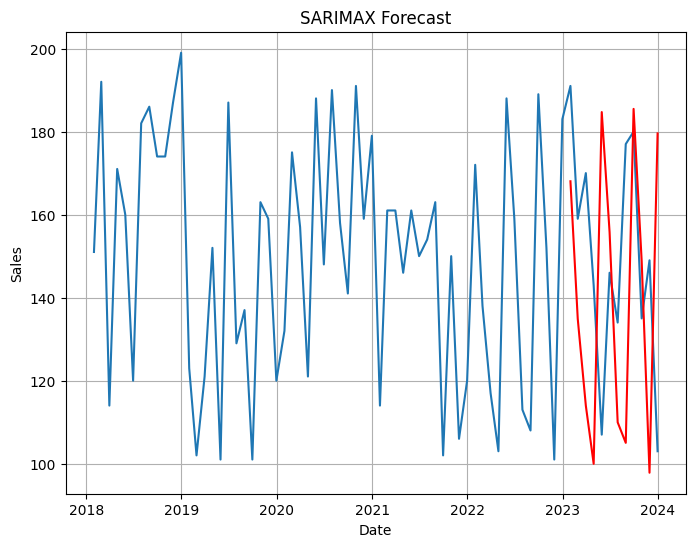

In [280]:
plt.figure(figsize=(8,6))

### Plot the original sales data

plt.plot(df['Sales'], label = 'Actual Sales Data')

### Plot the forecasted sales data

plt.plot(forecast_df['Forecast'], label = 'Forecasted Sales Data', color='red')

### title of the sales data
plt.title("SARIMAX Forecast")

### x label
plt.xlabel("Date")

### y label
plt.ylabel("Sales")


plt.grid()

plt.show()

### OBSERVATIONS:

1. The graph depicts about the SARIMAX forecast data from 2018 till 2024 .

2. It has both the trend and seasonality.